# Fxyz3D Example
This is an example :+1: how to use **Fxyz3d** in *JTaccuino*.
## Dependencies
To use **Fxyz3d** we need to add it to our environment using `addDependency`

In [0]:
addDependency("org.fxyz3d:fxyz3d:0.6.0");

Now we add some `import`'s to make the necessary types available:

In [0]:
import javafx.scene.Group;
import javafx.scene.PerspectiveCamera;
import javafx.scene.SceneAntialiasing;
import javafx.scene.SubScene;
import javafx.scene.paint.Color;
import javafx.scene.shape.CullFace;
import org.fxyz3d.shapes.primitives.SpringMesh;
import org.fxyz3d.shapes.primitives.helper.TriangleMeshHelper;
import org.fxyz3d.utils.CameraTransformer;

Let's setup some `Camera` stuff so we have **3D**
- use  `PerspectiveCamera`
- and do some transform

In [0]:
var camera = new PerspectiveCamera(true);
camera.setNearClip(0.1);
camera.setFarClip(10000.0);
camera.setTranslateX(10);
camera.setTranslateZ(-100);
camera.setFieldOfView(20);

var cameraTransform = new CameraTransformer();
cameraTransform.getChildren().add(camera);
cameraTransform.ry.setAngle(-30.0);
cameraTransform.rx.setAngle(-15.0);

Define the `spring` to show as a *mesh*

In [0]:
var spring = new SpringMesh(10, 2, 2, 8 * 2 * Math.PI, 200, 100, 0, 0);
spring.setCullFace(CullFace.NONE);
spring.setTextureModeVertices3D(1530, p -> p.f);

Build a subscene so that we can show everything in *JavaFX*

In [0]:
var group = new Group(cameraTransform, spring);
var subScene = new SubScene(group, 600, 200, true, SceneAntialiasing.BALANCED);
subScene.setCamera(camera);

Use magic `display` call to show the `subScene` in **JTaccuino**  :clap:

Alternatively use some animation magic
```
display(subScene, i -> {
  var section = TriangleMeshHelper.SectionType.values();
  spring.setSectionType(section[i%section.length]);
});
```
or
```
display(subScene, i -> {
java.util.function.Function<org.fxyz3d.geometry.Point3D, Number> dens = p -> 
  (float)(p.x * Math.cos(i%100 * 2 * Math.PI/50d) +p.y * Math.sin(i%100 * 2 * Math.PI/50d));
spring.setTextureModeVertices3D(1530, dens);
});
```

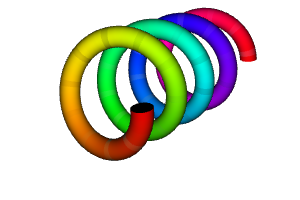

In [0]:
display(subScene);